In [64]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor


from sklearn.datasets import load_digits

In [3]:
#load dataset
df = pd.read_csv('Mohamed Elsayed 202100372 - insurance.csv')
df.info

<bound method DataFrame.info of        age     sex     bmi  children smoker     region      charges
0     19.0  female  27.900         0    yes  southwest  16884.92400
1     18.0    male  33.770         1     no  southeast   1725.55230
2     28.0    male  33.000         3     no  southeast   4449.46200
3     33.0    male  22.705         0     no  northwest  21984.47061
4     32.0    male  28.880         0     no  northwest   3866.85520
...    ...     ...     ...       ...    ...        ...          ...
1333  50.0    male  30.970         3     no  northwest  10600.54830
1334  18.0  female  31.920         0     no  northeast   2205.98080
1335  18.0  female  36.850         0     no  southeast   1629.83350
1336  21.0  female  25.800         0     no  southwest   2007.94500
1337  61.0  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


###  Drop Null Values

In [5]:
##Write your code here
#droping null values
df.dropna(inplace=True)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


# Encode Data

In [8]:
lenc = LabelEncoder()

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
df['sex'] 

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1331, dtype: object

In [11]:
df['sex'] = lenc.fit_transform(df['sex'])
df['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1331, dtype: int32

In [12]:
df['smoker'] = lenc.fit_transform(df['smoker'])
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1331, dtype: int32

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0,1,southwest,16884.92400
1,18.0,1,33.770,1,0,southeast,1725.55230
2,28.0,1,33.000,3,0,southeast,4449.46200
3,33.0,1,22.705,0,0,northwest,21984.47061
4,32.0,1,28.880,0,0,northwest,3866.85520


In [14]:
df= pd.get_dummies(df,drop_first=True,dtype='i')

In [15]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19.0,0,27.900,0,1,16884.92400,0,0,1
1,18.0,1,33.770,1,0,1725.55230,0,1,0
2,28.0,1,33.000,3,0,4449.46200,0,1,0
3,33.0,1,22.705,0,0,21984.47061,1,0,0
4,32.0,1,28.880,0,0,3866.85520,1,0,0


## Splitting Data 80% train , 20% test



In [16]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scal Data using MinMaxScaler Scaler

In [18]:
print(X_train.shape)
print(X_test.shape)

(1064, 8)
(267, 8)


In [19]:
X_train

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
591,47.0,1,19.570,1,0,1,0,0
970,50.0,0,28.160,3,0,0,1,0
1311,33.0,0,26.695,0,0,1,0,0
177,54.0,1,29.200,1,0,0,0,1
854,49.0,0,23.845,3,1,0,0,0
...,...,...,...,...,...,...,...,...
1102,29.0,1,38.940,1,0,0,1,0
1137,26.0,0,22.230,0,0,1,0,0
1301,62.0,1,30.875,3,1,1,0,0
867,57.0,1,43.700,1,0,0,0,1


In [20]:
# we need to scale our data to be in the same range and to avoid any feature to be dominant over the other
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Apply LinearRegression
 Evaluate Model using MAE,MSE, and r2_score


In [21]:
#Linear Regression
l_r = LinearRegression()
l_r.fit(X_train_scaled,y_train)

# to get the intercept
print(l_r.intercept_)
#For retrieving the slope(coefficients of the features):  
print(l_r.coef_)

-1405.8064144778873
[11490.10017837  -164.2768294  12201.56633836  2129.44838665
 23625.4144658   -143.37246738 -1114.21845449 -1011.88896952]


In [22]:
#predicting the test set
y_pred = l_r.predict(X_test_scaled)
#y_pred
#finding the error
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

MAE: 3981.1386623073636
MSE: 31191047.094524883


In [23]:
#score
print('R2 score:', r2_score(y_test, y_pred))

R2 score: 0.8006165850326453


## Apply polynomial Featutres To Enhance Results
 Evaluate Model using MAE,MSE, and r2_score

In [24]:
#Evaluate Model using MAE,MSE, and r2_score
mae_l = []
mse_l = []
r2_l = []

for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    l_r.fit(X_train_poly,y_train)
    y_pred_poly = l_r.predict(X_test_poly)
    mae = mean_absolute_error(y_test, y_pred_poly)
    mae_l.append(mae)
    mse = mean_squared_error(y_test, y_pred_poly)
    mse_l.append(mse)
    r2 = r2_score(y_test, y_pred_poly)
    r2_l.append(r2)

    print(f"Degree: {i}")
    print(f'mean absolute error : {mae}')
    print(f'mean square derror : {mse}')
    print(f'Accuracy , r2 score : {r2}')
    print("-"*20)

Degree: 1
mean absolute error : 3981.1386623073645
mean square derror : 31191047.094524883
Accuracy , r2 score : 0.8006165850326453
--------------------
Degree: 2
mean absolute error : 2735.122728089342
mean square derror : 16909556.547198053
Accuracy , r2 score : 0.8919085621028814
--------------------
Degree: 3
mean absolute error : 2814.0811859395517
mean square derror : 16812784.415476095
Accuracy , r2 score : 0.8925271613450909
--------------------


Degree: 4
mean absolute error : 3132.4348308397107
mean square derror : 23073019.657220725
Accuracy , r2 score : 0.8525096820595965
--------------------
Degree: 5
mean absolute error : 4914.896615314606
mean square derror : 75621386.64742048
Accuracy , r2 score : 0.5166032653973945
--------------------


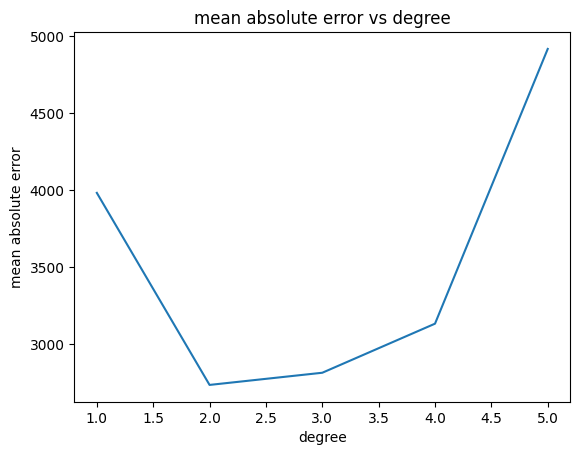

In [25]:
degree = [i for i in range(1,6)]


plt.plot(degree,mae_l)
plt.xlabel('degree')
plt.ylabel('mean absolute error')
plt.title('mean absolute error vs degree')
plt.show()

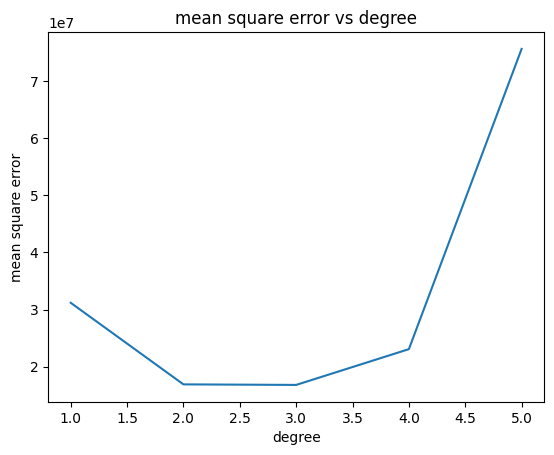

In [26]:
plt.plot(degree,mse_l)
plt.xlabel('degree')
plt.ylabel('mean square error')
plt.title('mean square error vs degree')
plt.show()

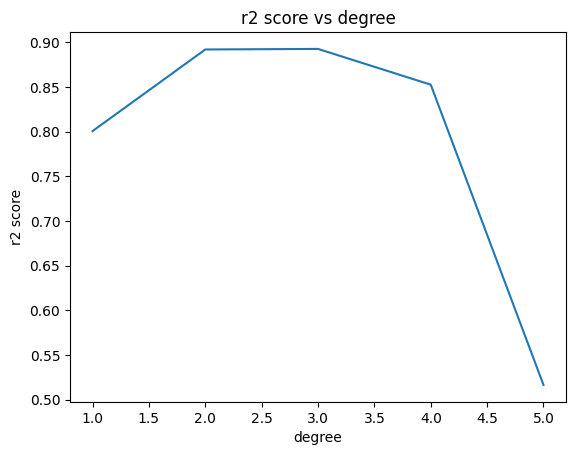

In [27]:
plt.plot(degree,r2_l)
plt.xlabel('degree')
plt.ylabel('r2 score')
plt.title('r2 score vs degree')
plt.show()

### As we can see from the graphs that the best degree is 2 as it has the lowest mean absolute error and mean square error and the highest r2 score

### Apply Regularization Lasso, Ridge with diffrent alpha
 Evaluate Model using MAE,MSE, and r2_score

In [28]:
#Lasoo Regression
maes = []
mses = []
r2s = []

In [29]:
lamdas = [0.0001,0.001,0.01,0.1,1,10,100,1000]

for lamda in lamdas:
    poly = PolynomialFeatures(degree=7)
    x_poly = poly.fit_transform(X_train_scaled)

    lr = Lasso(alpha=lamda)
    lr.fit(x_poly, y_train)
    
    pred_poly = lr.predict(poly.transform(X_test_scaled))

    mae = mean_absolute_error(y_test, pred_poly)
    mse = mean_squared_error(y_test, pred_poly)
    r2 = r2_score(y_test, pred_poly)

    maes.append(mae)
    mses.append(mse)
    r2s.append(r2)

    print(f"Lambda: {lamda}")
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R2 Score: {r2}')
    print("-" * 50)


C:\Users\Morshedy\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.725e+09, tolerance: 1.534e+07
  model = cd_fast.enet_coordinate_descent(


Lambda: 0.0001
Mean Absolute Error: 4145.07845349373
Mean Squared Error: 76572251.53102297
R2 Score: 0.5105250248339837
--------------------------------------------------


C:\Users\Morshedy\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.786e+09, tolerance: 1.534e+07
  model = cd_fast.enet_coordinate_descent(


Lambda: 0.001
Mean Absolute Error: 4130.57291705897
Mean Squared Error: 75057320.27334261
R2 Score: 0.5202089628781836
--------------------------------------------------


C:\Users\Morshedy\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.133e+09, tolerance: 1.534e+07
  model = cd_fast.enet_coordinate_descent(


Lambda: 0.01
Mean Absolute Error: 3928.6855249440946
Mean Squared Error: 55927789.65935498
R2 Score: 0.6424912039642456
--------------------------------------------------


C:\Users\Morshedy\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.017e+09, tolerance: 1.534e+07
  model = cd_fast.enet_coordinate_descent(


Lambda: 0.1
Mean Absolute Error: 3075.1533374072146
Mean Squared Error: 22819153.991913013
R2 Score: 0.8541324747519552
--------------------------------------------------


C:\Users\Morshedy\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.674e+08, tolerance: 1.534e+07
  model = cd_fast.enet_coordinate_descent(


Lambda: 1
Mean Absolute Error: 2679.088281409728
Mean Squared Error: 16863317.01227281
R2 Score: 0.8922041403934068
--------------------------------------------------
Lambda: 10
Mean Absolute Error: 2543.3155281272266
Mean Squared Error: 15158998.54875649
R2 Score: 0.903098703644778
--------------------------------------------------
Lambda: 100
Mean Absolute Error: 2785.8274707353844
Mean Squared Error: 17011553.911586802
R2 Score: 0.8912565614577005
--------------------------------------------------
Lambda: 1000
Mean Absolute Error: 5923.403415179424
Mean Squared Error: 61758474.249222875
R2 Score: 0.6052195534934458
--------------------------------------------------


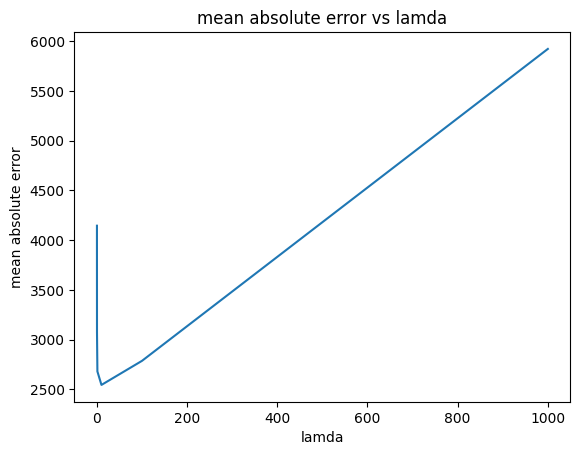

In [30]:
plt.plot(lamdas,maes)
plt.xlabel('lamda')
plt.ylabel('mean absolute error')
plt.title('mean absolute error vs lamda')
plt.show()

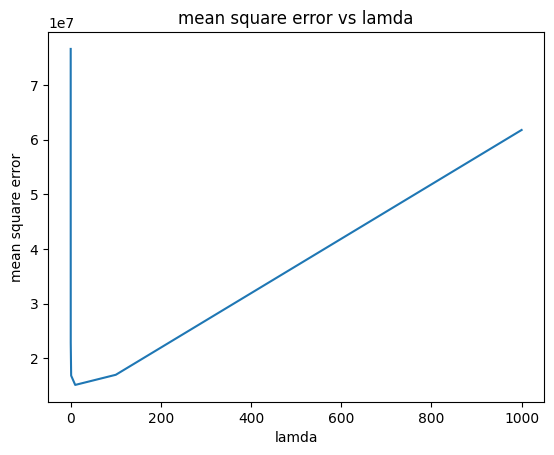

In [31]:
plt.plot(lamdas,mses)
plt.xlabel('lamda')
plt.ylabel('mean square error')
plt.title('mean square error vs lamda')
plt.show()

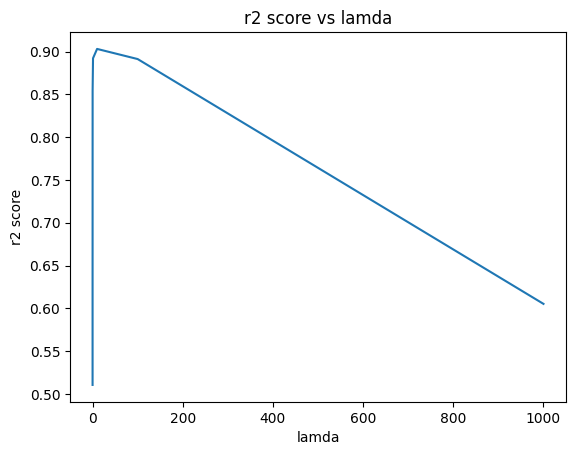

In [32]:
plt.plot(lamdas,r2s)
plt.xlabel('lamda')
plt.ylabel('r2 score')
plt.title('r2 score vs lamda')
plt.show()


###  As we can see from the graphs above that the best lamda is 10 as it has the lowest mean absolute error and mean square error and the highest r2 score

## Ridge

In [33]:
maes = []
mses = []
r2s = []

lamdas = [0.0001,0.001,0.01,0.1,1,10,100,1000]

In [34]:
for lamda in lamdas:
    poly = PolynomialFeatures(degree=7)
    x_poly = poly.fit_transform(X_train_scaled)

    lr = Ridge(alpha=lamda)
    lr.fit(x_poly, y_train)
    
    pred_poly = lr.predict(poly.transform(X_test_scaled))

    mae = mean_absolute_error(y_test, pred_poly)
    mse = mean_squared_error(y_test, pred_poly)
    r2 = r2_score(y_test, pred_poly)

    maes.append(mae)
    mses.append(mse)
    r2s.append(r2)

    print(f"Lambda: {lamda}")
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R2 Score: {r2}')
    print("-" * 50)

Lambda: 0.0001
Mean Absolute Error: 4476.451205679611
Mean Squared Error: 64647096.51649866
R2 Score: 0.5867545314486653
--------------------------------------------------
Lambda: 0.001
Mean Absolute Error: 3654.4642423521746
Mean Squared Error: 38715795.61643619
R2 Score: 0.7525159216428424
--------------------------------------------------
Lambda: 0.01
Mean Absolute Error: 3080.150673970617
Mean Squared Error: 23304065.767921634
R2 Score: 0.8510327594533478
--------------------------------------------------
Lambda: 0.1
Mean Absolute Error: 2879.6703369294614
Mean Squared Error: 20436537.938060883
R2 Score: 0.8693629389275702
--------------------------------------------------
Lambda: 1
Mean Absolute Error: 2765.9919525455302
Mean Squared Error: 17427569.74425773
R2 Score: 0.8885972516516831
--------------------------------------------------
Lambda: 10
Mean Absolute Error: 2783.522904076624
Mean Squared Error: 16921929.780312393
R2 Score: 0.8918294683339211
----------------------------

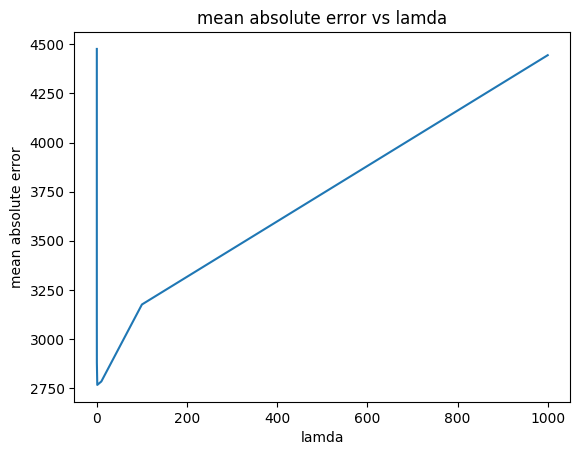

In [35]:
plt.plot(lamdas,maes)
plt.xlabel('lamda')
plt.ylabel('mean absolute error')
plt.title('mean absolute error vs lamda')
plt.show()


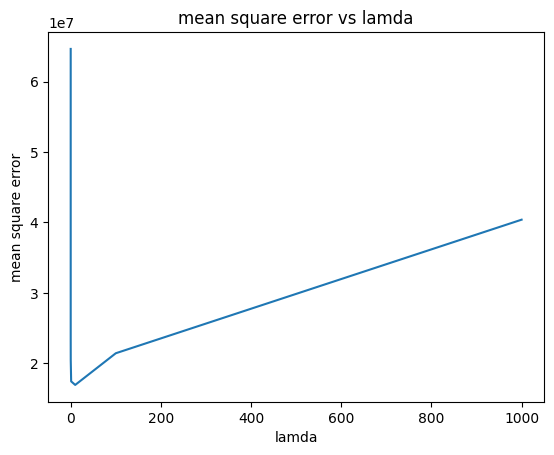

In [36]:
plt.plot(lamdas,mses)
plt.xlabel('lamda')
plt.ylabel('mean square error')
plt.title('mean square error vs lamda')
plt.show()

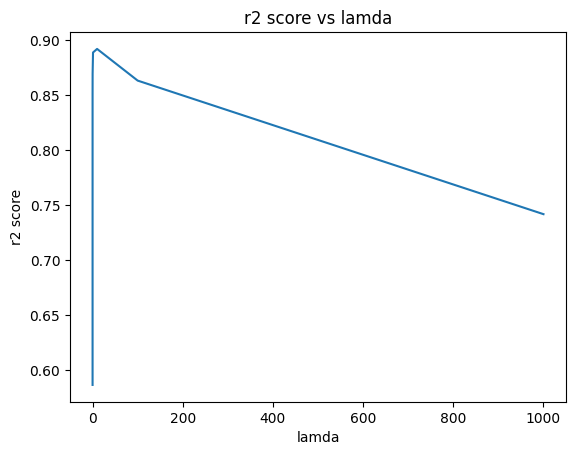

In [37]:
plt.plot(lamdas,r2s)
plt.xlabel('lamda')
plt.ylabel('r2 score')
plt.title('r2 score vs lamda')
plt.show()

## As we can see from the graphs above that the best lamda is 10 for both lasso and ridge regression


### Gradient Descent Algorithm
 Evaluate Model using MAE,MSE, and r2_score

In [38]:
alphas = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10]

In [39]:
maes = []
mses = []
r2s = []

for alpha in alphas:
    poly = PolynomialFeatures(degree=7)
    x_poly = poly.fit_transform(X_train_scaled)

    lr = SGDRegressor(alpha=alpha)
    lr.fit(x_poly, y_train)
    
    pred_poly = lr.predict(poly.transform(X_test_scaled))

    mae = mean_absolute_error(y_test, pred_poly)
    mse = mean_squared_error(y_test, pred_poly)
    r2 = r2_score(y_test, pred_poly)

    maes.append(mae)
    mses.append(mse)
    r2s.append(r2)

    print(f"Alpha: {alpha}")
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R2 Score: {r2}')
    print("-" * 20)

Alpha: 1e-06
Mean Absolute Error: 2833.657419967487
Mean Squared Error: 17425563.38693147
R2 Score: 0.888610076946523
--------------------
Alpha: 1e-05
Mean Absolute Error: 2771.0035044945894
Mean Squared Error: 17083146.40509414
R2 Score: 0.8907989187309827
--------------------
Alpha: 0.0001
Mean Absolute Error: 2903.326331685014
Mean Squared Error: 17155717.445911545
R2 Score: 0.8903350208085417
--------------------
Alpha: 0.001
Mean Absolute Error: 2805.115217381309
Mean Squared Error: 17325756.91250035
R2 Score: 0.8892480727036909
--------------------
Alpha: 0.01
Mean Absolute Error: 2921.294464698223
Mean Squared Error: 17972572.708534047
R2 Score: 0.8851134137460356
--------------------
Alpha: 0.1
Mean Absolute Error: 3085.991567861322
Mean Squared Error: 21399998.83463924
R2 Score: 0.8632041805131718
--------------------
Alpha: 1
Mean Absolute Error: 4730.904276882251
Mean Squared Error: 40107179.94561979
R2 Score: 0.7436217361336491
--------------------
Alpha: 10
Mean Absolute 

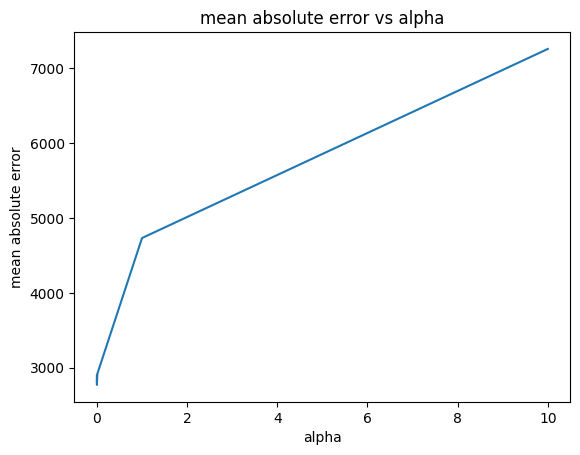

In [40]:
plt.plot(alphas,maes)
plt.xlabel('alpha')
plt.ylabel('mean absolute error')
plt.title('mean absolute error vs alpha')
plt.show()

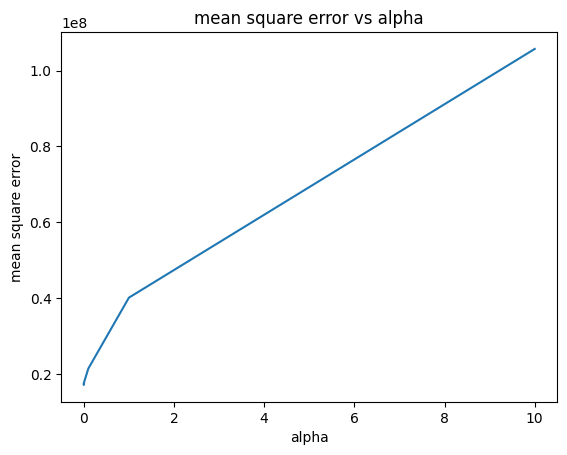

In [41]:
plt.plot(alphas,mses)
plt.xlabel('alpha')
plt.ylabel('mean square error')
plt.title('mean square error vs alpha')
plt.show()

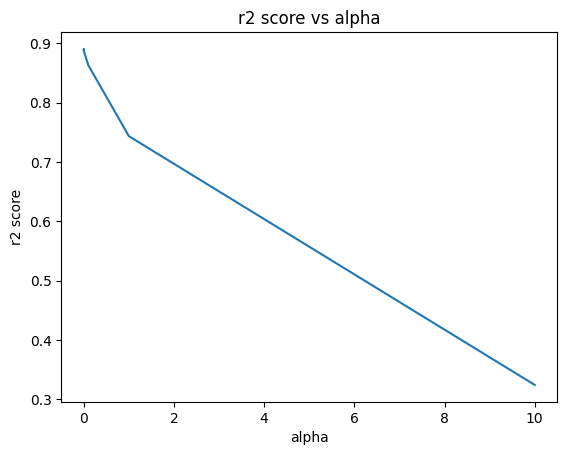

In [42]:
plt.plot(alphas,r2s)
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title('r2 score vs alpha')
plt.show()


- the inverse proportionality between accuracy and learning rate value can be observed in previous curves

#### Polynomial Features + Gradient Descent :


In [43]:
poly = PolynomialFeatures(degree=7)
x_poly = poly.fit_transform(X_train_scaled)

lr = SGDRegressor(alpha=0.00001)
lr.fit(x_poly, y_train)

pred_poly = lr.predict(poly.transform(X_test_scaled))

mae = mean_absolute_error(y_test, pred_poly)
mse = mean_squared_error(y_test, pred_poly)
r2 = r2_score(y_test, pred_poly)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R2 Score(Accuracy): {r2}')

Mean Absolute Error: 2621.4199298104872
Mean Squared Error: 17025004.45587365
R2 Score(Accuracy): 0.891170581161978


# Apply linerear Classifier on two number of Minist data set fro ex:1 and 5 


In [44]:
mnist = load_digits()

type(mnist)


sklearn.utils._bunch.Bunch

In [45]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [46]:
mnist.target.shape

(1797,)

In [47]:
df = pd.DataFrame(mnist.data, columns=mnist.feature_names)

In [48]:
df['target'] = mnist.target

In [49]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [50]:
target_df = df[df['target'].isin([1, 5])]

In [51]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 1 to 1787
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  364 non-null    float64
 1   pixel_0_1  364 non-null    float64
 2   pixel_0_2  364 non-null    float64
 3   pixel_0_3  364 non-null    float64
 4   pixel_0_4  364 non-null    float64
 5   pixel_0_5  364 non-null    float64
 6   pixel_0_6  364 non-null    float64
 7   pixel_0_7  364 non-null    float64
 8   pixel_1_0  364 non-null    float64
 9   pixel_1_1  364 non-null    float64
 10  pixel_1_2  364 non-null    float64
 11  pixel_1_3  364 non-null    float64
 12  pixel_1_4  364 non-null    float64
 13  pixel_1_5  364 non-null    float64
 14  pixel_1_6  364 non-null    float64
 15  pixel_1_7  364 non-null    float64
 16  pixel_2_0  364 non-null    float64
 17  pixel_2_1  364 non-null    float64
 18  pixel_2_2  364 non-null    float64
 19  pixel_2_3  364 non-null    float64
 20  pixel_2_4  364

In [52]:
print(target_df['target'].value_counts())
target_df.head()

target
1    182
5    182
Name: count, dtype: int64


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
11,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0,1
15,0.0,5.0,12.0,13.0,16.0,16.0,2.0,0.0,0.0,11.0,...,0.0,0.0,4.0,15.0,16.0,2.0,0.0,0.0,0.0,5
21,0.0,0.0,0.0,2.0,16.0,16.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,12.0,15.0,4.0,0.0,1


In [53]:
target_df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,364.0,364.000000,364.00000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.0,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,0.0,0.489011,6.21978,11.123626,12.151099,9.129121,2.568681,0.021978,0.002747,1.994505,...,0.321429,0.0,0.480769,6.453297,11.936813,11.195055,5.554945,1.623626,0.747253,3.000000
std,0.0,1.284530,5.31032,5.000671,4.264237,5.908609,3.780945,0.195149,0.052414,3.208112,...,1.429127,0.0,1.273663,5.607503,5.207419,4.691928,6.010528,4.111208,2.933021,2.002753
min,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.0,0.000000,1.00000,9.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,1.000000,11.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,0.0,0.000000,6.00000,12.000000,13.000000,11.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,6.000000,14.000000,13.000000,3.000000,0.000000,0.000000,3.000000
75%,0.0,0.000000,11.00000,15.000000,16.000000,15.000000,4.000000,0.000000,0.000000,4.000000,...,0.000000,0.0,0.000000,11.000000,16.000000,15.000000,11.000000,0.000000,0.000000,5.000000
max,0.0,8.000000,16.00000,16.000000,16.000000,16.000000,16.000000,2.000000,1.000000,14.000000,...,13.000000,0.0,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,5.000000


### evaluation 

In [54]:
X = target_df.drop('target', axis=1)
y = target_df['target']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regression

In [65]:
lr = LinearSVC()
lr.fit(X_train, y_train)


C:\Users\Morshedy\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [66]:
pred = lr.predict(X_test)

y_pred = np.round(pred)

In [67]:
y_pred

array([1, 5, 5, 1, 5, 5, 5, 5, 1, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1, 5, 1, 1,
       1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 1, 5, 5, 1, 1, 5, 5, 1, 5, 1, 5,
       5, 5, 1, 1, 5, 1, 5, 5, 1, 5, 1, 5, 5, 5, 1, 5, 5, 5, 1, 1, 5, 5,
       5, 1, 1, 1, 1, 5, 1])

In [68]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R2 Score(Accuracy): {r2}')


Mean Absolute Error: 0.0
Mean Squared Error: 0.0
R2 Score(Accuracy): 1.0
